In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/urldata.csv")
data.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [ ]:
data.describe()

,Unnamed: 0,result
count,450176.000000,450176.000000
mean,225087.500000,0.231994
std,129954.761729,0.422105
min,0.000000,0.000000
25%,112543.750000,0.000000
50%,225087.500000,0.000000
75%,337631.250000,0.000000
max,450175.000000,1.000000


In [ ]:
data.isnull().sum()

Unnamed: 0    0
url           0
label         0
result        0
dtype: int64

Text(0, 0.5, 'Count')

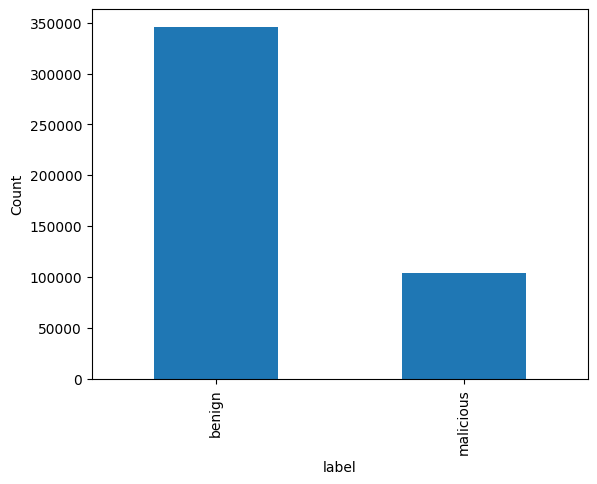

In [ ]:
data['label'].value_counts().plot(kind='bar')
plt.ylabel("Count")

In [ ]:
data.describe()

,Unnamed: 0,result,url_len,hostname_len,count_www,count-https,count-http,count.,count%,count?,...,short_url,fd_length,tld_length,sus_url,count-digits,count-letters,use_of_ip_address,google_index,class_type,url_entropy
count,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,...,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.0,450176.000000,450176.000000
mean,225087.500000,0.231994,60.237849,19.295358,0.803639,0.784693,1.007039,2.620553,0.090007,0.152854,...,0.066367,8.126335,3.187904,0.051187,4.194171,45.503403,0.006506,1.0,0.231994,4.310454
std,129954.761729,0.422105,37.571613,6.689422,0.401434,0.412508,0.099988,1.144966,1.166887,0.462658,...,0.248923,10.139786,1.475767,0.220378,9.222017,27.004431,0.080399,0.0,0.422105,0.321874
min,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,4.000000,0.000000,1.0,0.000000,1.339504
25%,112543.750000,0.000000,40.000000,15.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,4.000000,3.000000,0.000000,0.000000,31.000000,0.000000,1.0,0.000000,4.103910
50%,225087.500000,0.000000,52.000000,18.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,6.000000,3.000000,0.000000,1.000000,40.000000,0.000000,1.0,0.000000,4.294395
75%,337631.250000,0.000000,71.000000,22.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,10.000000,3.000000,0.000000,6.000000,54.000000,0.000000,1.0,0.000000,4.514718
max,450175.000000,1.000000,2314.000000,240.000000,6.000000,8.000000,10.000000,32.000000,134.000000,166.000000,...,1.000000,408.000000,41.000000,1.000000,631.000000,1839.000000,1.000000,1.0,1.000000,6.027583


In [ ]:
data['url'].value_counts()

url
https://www.google.com                                                                                                                             1
https://www.tabheaven.com/gales-eric-tabs.html                                                                                                     1
https://www.tabs-database.com/justin-mcroberts-chords.html                                                                                         1
https://www.tabpower.com/a806.html                                                                                                                 1
https://www.tabor.edu/alumni/directory?decade=1960                                                                                                 1
                                                                                                                                                  ..
https://www.billboard.com/artist/anita-pointer/discography/songs/23169                                

In [ ]:
def url_length(url):
  return len(str(url))
data['url_len'] = data['url'].apply(lambda i :url_length(i))

data['url'] = data['url'].astype(str)

from urllib.parse import urlparse
def hostname_len(url):
  return len(urlparse(url).netloc)
data['hostname_len'] = data['url'].apply(lambda i:hostname_len(i))

def count_www(url):
  url.count('www')
  return url.count('www')
data['count_www'] = data['url'].apply(lambda i: count_www(i))

def count_https(url):
    return url.count('https')
data['count-https'] = data['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')
data['count-http'] = data['url'].apply(lambda i : count_http(i))

def count_dot(url):
    count_dot = url.count('.')
    return count_dot
data['count.'] = data['url'].apply(lambda i: count_dot(i))

def count_per(url):
    return url.count('%')
data['count%'] = data['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')
data['count?'] = data['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')
data['count-'] = data['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')
data['count='] = data['url'].apply(lambda i: count_equal(i))

def count_atrate(url):
    return url.count('@')
data['count@'] = data['url'].apply(lambda i: count_atrate(i))
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
data['count_dir'] = data['url'].apply(lambda i: no_of_dir(i))
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
data['count_embed_domian'] = data['url'].apply(lambda i: no_of_embed(i))
data

,Unnamed: 0,url,label,result,url_len,hostname_len,count_www,count-https,count-http,count.,count%,count?,count-,count=,count@,count_dir,count_embed_domian
0,0,https://www.google.com,benign,0,22,14,1,1,1,2,0,0,0,0,0,0,0
1,1,https://www.youtube.com,benign,0,23,15,1,1,1,2,0,0,0,0,0,0,0
2,2,https://www.facebook.com,benign,0,24,16,1,1,1,2,0,0,0,0,0,0,0
3,3,https://www.baidu.com,benign,0,21,13,1,1,1,2,0,0,0,0,0,0,0
4,4,https://www.wikipedia.org,benign,0,25,17,1,1,1,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,11,0,0,1,2,0,0,1,0,0,3,0
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,13,0,0,1,2,0,0,0,1,0,12,0
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,13,0,0,1,1,0,0,0,1,0,12,0
450174,450174,http://atualizapj.com/,malicious,1,22,14,0,0,1,1,0,0,0,0,0,1,0


In [ ]:
data.columns

Index(['Unnamed: 0', 'url', 'label', 'result', 'url_len', 'hostname_len',
       'count_www', 'count-https', 'count-http', 'count.', 'count%', 'count?',
       'count-', 'count=', 'count@', 'count_dir', 'count_embed_domian'],
      dtype='object')

In [ ]:
!pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 2.3 MB/s eta 0:00:00


In [ ]:
from nltk import re
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adataset\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
data['short_url'] = data['url'].apply(lambda i: shortening_service(i))

from tld import get_tld

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
data['fd_length'] = data['url'].apply(lambda i: fd_length(i))
#Length of Top Level Domain
data['tld'] = data['url'].apply(lambda i: get_tld(i,fail_silently=True))

def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
data['tld_length'] = data['tld'].apply(lambda i: tld_length(i))
#data = data.drop(columns=['tld'],inplace=True)
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0

data['sus_url'] = data['url'].apply(lambda i: suspicious_words(i))

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
data['count-digits']= data['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

data['count-letters']= data['url'].apply(lambda i: letter_count(i))

In [ ]:

def having_ip_address(url: str) -> int:
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
data['use_of_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))
data

,Unnamed: 0,url,label,result,url_len,hostname_len,count_www,count-https,count-http,count.,...,count_dir,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,use_of_ip_address
0,0,https://www.google.com,benign,0,22,14,1,1,1,2,...,0,0,0,0,com,3,0,0,17,0
1,1,https://www.youtube.com,benign,0,23,15,1,1,1,2,...,0,0,0,0,com,3,0,0,18,0
2,2,https://www.facebook.com,benign,0,24,16,1,1,1,2,...,0,0,0,0,com,3,0,0,19,0
3,3,https://www.baidu.com,benign,0,21,13,1,1,1,2,...,0,0,0,0,com,3,0,0,16,0
4,4,https://www.wikipedia.org,benign,0,25,17,1,1,1,2,...,0,0,0,0,org,3,0,0,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,11,0,0,1,2,...,3,0,1,8,com,3,0,0,34,0
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,13,0,0,1,2,...,12,0,0,2,com,3,0,21,118,0
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,13,0,0,1,1,...,12,0,0,2,com,3,0,20,109,0
450174,450174,http://atualizapj.com/,malicious,1,22,14,0,0,1,1,...,1,0,0,0,com,3,0,0,17,0


In [ ]:
data['use_of_ip_address'].value_counts()

use_of_ip_address
0    447247
1      2929
Name: count, dtype: int64

In [ ]:

from googlesearch import search
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
data['google_index'] = data['url'].apply(lambda i: google_index(i))
data

,Unnamed: 0,url,label,result,url_len,hostname_len,count_www,count-https,count-http,count.,...,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,use_of_ip_address,google_index
0,0,https://www.google.com,benign,0,22,14,1,1,1,2,...,0,0,0,com,3,0,0,17,0,1
1,1,https://www.youtube.com,benign,0,23,15,1,1,1,2,...,0,0,0,com,3,0,0,18,0,1
2,2,https://www.facebook.com,benign,0,24,16,1,1,1,2,...,0,0,0,com,3,0,0,19,0,1
3,3,https://www.baidu.com,benign,0,21,13,1,1,1,2,...,0,0,0,com,3,0,0,16,0,1
4,4,https://www.wikipedia.org,benign,0,25,17,1,1,1,2,...,0,0,0,org,3,0,0,20,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,11,0,0,1,2,...,0,1,8,com,3,0,0,34,0,1
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,13,0,0,1,2,...,0,0,2,com,3,0,21,118,0,1
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,13,0,0,1,1,...,0,0,2,com,3,0,20,109,0,1
450174,450174,http://atualizapj.com/,malicious,1,22,14,0,0,1,1,...,0,0,0,com,3,0,0,17,0,1


In [ ]:
data.isnull().sum()

Unnamed: 0               0
url                      0
label                    0
result                   0
url_len                  0
hostname_len             0
count_www                0
count-https              0
count-http               0
count.                   0
count%                   0
count?                   0
count-                   0
count=                   0
count@                   0
count_dir                0
count_embed_domian       0
short_url                0
fd_length                0
tld                   4660
tld_length               0
sus_url                  0
count-digits             0
count-letters            0
use_of_ip_address        0
google_index             0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['class_type'] = lb.fit_transform(data['label'])

In [ ]:
def calculate_entropy(url):
    import collections
    url = url.strip()
    prob = [float(url.count(c)) / len(url) for c in dict(collections.Counter(url))]
    entropy = - sum([p * np.log2(p) for p in prob])
    return entropy

data['url_entropy'] = data['url'].apply(calculate_entropy)

In [ ]:
data.columns

Index(['Unnamed: 0', 'url', 'label', 'result', 'url_len', 'hostname_len',
       'count_www', 'count-https', 'count-http', 'count.', 'count%', 'count?',
       'count-', 'count=', 'count@', 'count_dir', 'count_embed_domian',
       'short_url', 'fd_length', 'tld', 'tld_length', 'sus_url',
       'count-digits', 'count-letters', 'use_of_ip_address', 'google_index',
       'class_type', 'url_entropy'],
      dtype='object')

In [ ]:
X = data[['use_of_ip_address', 'google_index', 'count_www', 'count@',
           'count_dir', 'count_embed_domian', 'short_url', 'count-https',
           'count-http', 'count%', 'count?', 'count-', 'count=', 'url_len',
           'hostname_len', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
           'count-letters','url_entropy']]

y = data['label']

In [ ]:
# Fit scaler and label encoder
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lb = LabelEncoder()
y_encoded = lb.fit_transform(y)


In [ ]:
# Further Feature Engineering: Example for entropy measure of characters in URL


In [ ]:
data.columns

Index(['Unnamed: 0', 'url', 'label', 'result', 'url_len', 'hostname_len',
       'count_www', 'count-https', 'count-http', 'count.', 'count%', 'count?',
       'count-', 'count=', 'count@', 'count_dir', 'count_embed_domian',
       'short_url', 'fd_length', 'tld', 'tld_length', 'sus_url',
       'count-digits', 'count-letters', 'use_of_ip_address', 'google_index',
       'class_type', 'url_entropy'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, stratify=y, test_size=0.2, random_state=5)

In [ ]:
# Initialize Random Forest
rf = RandomForestClassifier(random_state=5)

# Define reduced parameter distributions
param_distributions = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
from sklearn.model_selection import RandomizedSearchCV
# Randomized Search with fewer iterations and parallel processing
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=5)
random_search.fit(X_train, y_train)

# Evaluate the model
y_pred = random_search.predict(X_test)
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: ", random_search.best_score_)
print("Test set accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best parameters found:  {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 20}
Best cross-validation accuracy:  0.9974870883545288
Test set accuracy:  0.9972122262206229
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69148
           1       1.00      0.99      0.99     20888

    accuracy                           1.00     90036
   macro avg       1.00      1.00      1.00     90036
weighted avg       1.00      1.00      1.00     90036



In [ ]:
features=['use_of_ip_address', 'google_index', 'count_www', 'count@',
           'count_dir', 'count_embed_domian', 'short_url', 'count-https',
           'count-http', 'count%', 'count?', 'count-', 'count=', 'url_len',
           'hostname_len', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
           'count-letters','url_entropy']

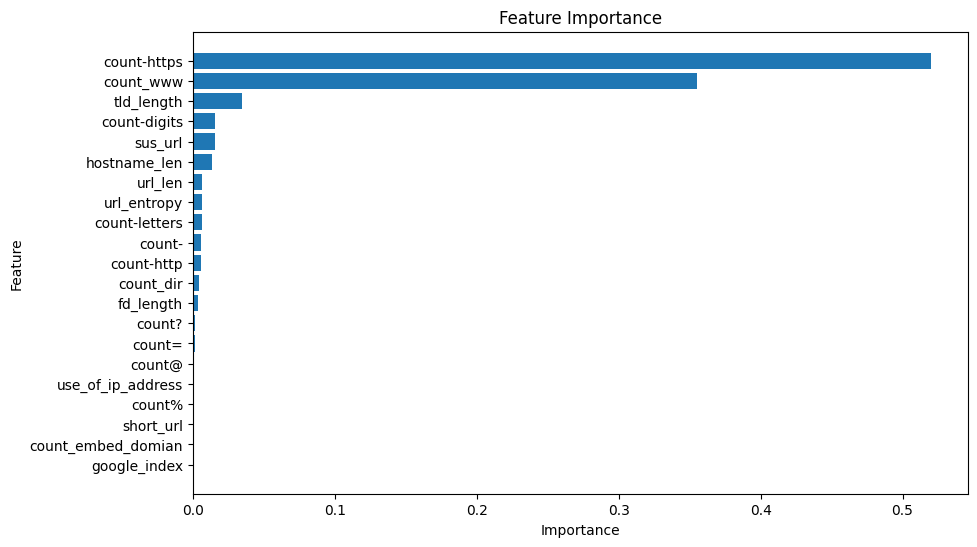

In [ ]:
import matplotlib.pyplot as plt
feature_importances = random_search.best_estimator_.feature_importances_

if len(features) == len(feature_importances):
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("The length of the features list does not match the length of the feature importances array.")
    print("Length of features list:", len(features))
    print("Length of feature importances array:", len(feature_importances))


In [ ]:
X = data[['count_www', 'count-https','url_entropy','count-http', 'count-', 'url_len','hostname_len', 'sus_url', 'tld_length', 'count-digits',
          'count-letters']]
y = data['class_type']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lb = LabelEncoder()
y_encoded = lb.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, stratify=y, test_size=0.2, random_state=5)

In [ ]:
rf = RandomForestClassifier(random_state=5)
gb = GradientBoostingClassifier(random_state=5)
ada = AdaBoostClassifier(random_state=5)

In [ ]:
voting_clf = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('ada', ada)], voting='soft')

In [ ]:
#training the model
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=5)),
                             ('gb', GradientBoostingClassifier(random_state=5)),
                             ('ada', AdaBoostClassifier(random_state=5))],
                 voting='soft')

In [ ]:
y_pred = voting_clf.predict(X_test)

In [ ]:
list(data['label'].unique())

['benign', 'malicious']

In [ ]:
# Evaluate the model
from sklearn.metrics import confusion_matrix
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_pred,y_test)

Accuracy: 0.9969345595095295
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69148
           1       1.00      0.99      0.99     20888

    accuracy                           1.00     90036
   macro avg       1.00      1.00      1.00     90036
weighted avg       1.00      1.00      1.00     90036



<Axes: >

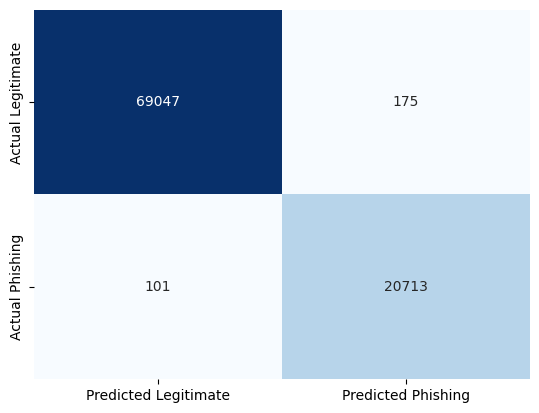

In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted Legitimate', 'Predicted Phishing'],
            yticklabels=['Actual Legitimate', 'Actual Phishing'])

In [ ]:
import joblib

# Save the trained model
joblib.dump(random_search.best_estimator_, 'random_forest_model.pkl')
joblib.dump(voting_clf, '/content/drive/MyDrive/Datasets/voting_model.pkl')

['/content/drive/MyDrive/Datasets/voting_model.pkl']

In [ ]:
joblib.dump(scaler, '/content/drive/MyDrive/Datasets/scaler.pkl')
joblib.dump(lb, '/content/drive/MyDrive/Datasets/label_encoder.pkl')

['/content/drive/MyDrive/Datasets/label_encoder.pkl']